In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preprocessing 

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df=df.drop('CustomerID',axis='columns')

In [4]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Genre']= label_encoder.fit_transform(df['Genre'])
df['Genre'].unique()
#male=1 female=0

array([1, 0])

In [8]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Finding the ideal clusters 

In [9]:
X1=df[['Age','Spending Score (1-100)']]

In [10]:
from sklearn.cluster import KMeans

In [11]:
inertia1=[]
for k in range(1,11):
    kmean1=KMeans(n_clusters=k).fit(X1)
    inertia1.append(kmean1.inertia_)

Text(0, 0.5, 'Inertia')

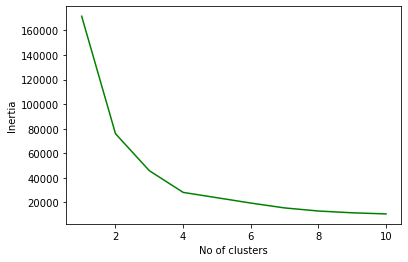

In [12]:
plt.plot(range(1,11),inertia1,'g-')
plt.xlabel('No of clusters')
plt.ylabel("Inertia")

So We can see that we can divide X1 in 4 clusters

In [13]:
X2=df[['Annual Income (k$)','Spending Score (1-100)']]
inertia2=[]
for k in range(1,11):
    kmean2=KMeans(n_clusters=k).fit(X2)
    inertia2.append(kmean2.inertia_)

Text(0, 0.5, 'Inertia')

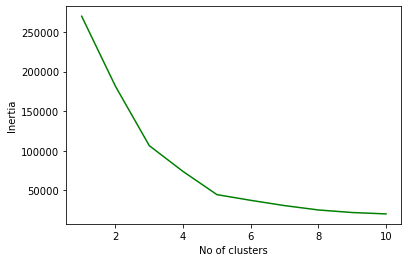

In [14]:
plt.plot(range(1,11),inertia2,'g-')
plt.xlabel('No of clusters')
plt.ylabel("Inertia")

So We can see that we can divide X2 in 5 clusters

In [15]:
from sklearn.cluster import KMeans

In [84]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)
y_kmeansAge = kmeans.predict(X1)
df['label']=kmeans.labels_

Text(0, 0.5, 'Spending Score (1-100)')

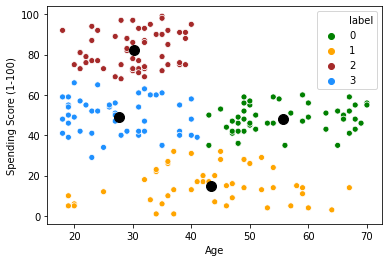

In [85]:
sns.scatterplot(df['Age'], df['Spending Score (1-100)'],hue=df['label'],palette=['green','orange','brown','dodgerblue'], legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

In [76]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X2)
y_kmeansAnnual = kmeans.predict(X2)
df['label']=kmeans.labels_

Text(0, 0.5, 'Spending Score (1-100)')

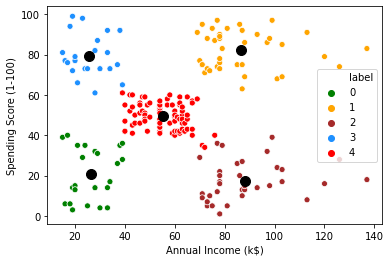

In [78]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'],hue=df['label'],palette=['green','orange','brown','dodgerblue','red'], legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Black Dot in above 2 sctterplot denotes Centriods of the Clusters